<a href="https://colab.research.google.com/github/msmsd778/OCR-FOR-CANVAS/blob/main/OCR_For_Canvas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import and Install Modules

In [ ]:
%pip install torch torchvision torchaudio
%pip install easyocr
%pip install opencv-python

In [11]:
import easyocr
import cv2
from matplotlib import pyplot as plt
import numpy as np

# Text Extraction From Entire File

In [42]:
filename = 'file.png'

# Modify the string below based on your demanding image
!wget -O file.png 'https://vizologi.com/wp-content/uploads/canvas/alibaba-business-model-canvas.png'

--2021-11-19 10:08:57--  https://vizologi.com/wp-content/uploads/canvas/alibaba-business-model-canvas.png
Resolving vizologi.com (vizologi.com)... 104.21.49.157, 172.67.191.48
Connecting to vizologi.com (vizologi.com)|104.21.49.157|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 357398 (349K) [image/png]
Saving to: ‘file.png’

file.png            100%[===================>] 349.02K  1.22MB/s    in 0.3s    

2021-11-19 10:08:58 (1.22 MB/s) - ‘file.png’ saved [357398/357398]



In [43]:
img = cv2.imread(filename)
dim = (2000, 1400)
resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
cv2.imwrite(filename, resized)

True

In [44]:
reader = easyocr.Reader(['en'], gpu=True)
result = reader.readtext(filename)
result

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


[([[1185, 7], [1455, 7], [1455, 25], [1185, 25]],
  'ALIBABA BUSINESS MODEL CANVAS',
  0.9434715986130823),
 ([[1627, 9], [1799, 9], [1799, 25], [1627, 25]],
  'More canvas at vizologi com',
  0.9226101640578361),
 ([[77, 43], [169, 43], [169, 57], [77, 57]],
  'KEY PARTNERS',
  0.998590896888123),
 ([[461, 43], [553, 43], [553, 57], [461, 57]],
  'KEY ACTIVITIES',
  0.9326598152684292),
 ([[839, 43], [975, 43], [975, 57], [839, 57]],
  'VALUE PROPOSITIONS',
  0.9997001528691828),
 ([[1225, 42], [1392, 42], [1392, 57], [1225, 57]],
  'CUSTOMER RELATIONSHIPS',
  0.9992551494427718),
 ([[1605, 43], [1743, 43], [1743, 59], [1605, 59]],
  'CUSTOMER SEGMENTS',
  0.8262127524215769),
 ([[59, 83], [97, 83], [97, 97], [59, 97]], 'Banks', 0.9999182722868009),
 ([[441, 83], [555, 83], [555, 97], [441, 97]],
  'Business identilies',
  0.8809765081936376),
 ([[821, 83], [1065, 83], [1065, 99], [821, 99]],
  'To make it easy t0 do business anywhere',
  0.6600702087202924),
 ([[1204, 86], [1268, 86]

# Seperating Boxes

In [45]:
cor = [None] * 10
for i in range (len(result)):
    x = result[i][1]
    if (x.upper() == 'KEY RESOURCES'):
        cor[6] = result[i][0]
        print(cor[6])
    elif (x.upper().endswith('CHANNELS')):
        cor[2] = result[i][0]
        print(cor[2])
    elif (x.upper() == 'KEY PARTNERS'):
        cor[7] = result[i][0]
        print(cor[7])
    elif (x.upper() == 'KEY ACTIVITIES'):
        cor[5] = result[i][0]
        print(cor[5])
    elif (x.upper() == 'VALUE PROPOSITIONS'):
        cor[1] = result[i][0]
        print(cor[1])
    elif (x.upper() == 'CUSTOMER RELATIONSHIPS'):
        cor[3] = result[i][0]
        print(cor[3])
    elif (x.upper().endswith('CUSTOMER SEGMENTS')):
        cor[0] = result[i][0]
        print(cor[0])
    elif (x.upper() == 'COST STRUCTURE'):
        cor[8] = result[i][0]
        print(cor[8])
    elif (x.upper() == 'REVENUE STREAMS'):
        cor[4] = result[i][0]
        print(cor[4])
    elif ('provided by vizologi' in x.lower()):
        cor[9] = result[i][0]
        print(cor[9])

[[77, 43], [169, 43], [169, 57], [77, 57]]
[[461, 43], [553, 43], [553, 57], [461, 57]]
[[839, 43], [975, 43], [975, 57], [839, 57]]
[[1225, 42], [1392, 42], [1392, 57], [1225, 57]]
[[1605, 43], [1743, 43], [1743, 59], [1605, 59]]
[[461, 491], [561, 491], [561, 505], [461, 505]]
[[1223, 491], [1291, 491], [1291, 505], [1223, 505]]
[[79, 925], [203, 925], [203, 939], [79, 939]]
[[1033, 925], [1171, 925], [1171, 939], [1033, 939]]
[[1738, 1372], [1933, 1372], [1933, 1393], [1738, 1393]]


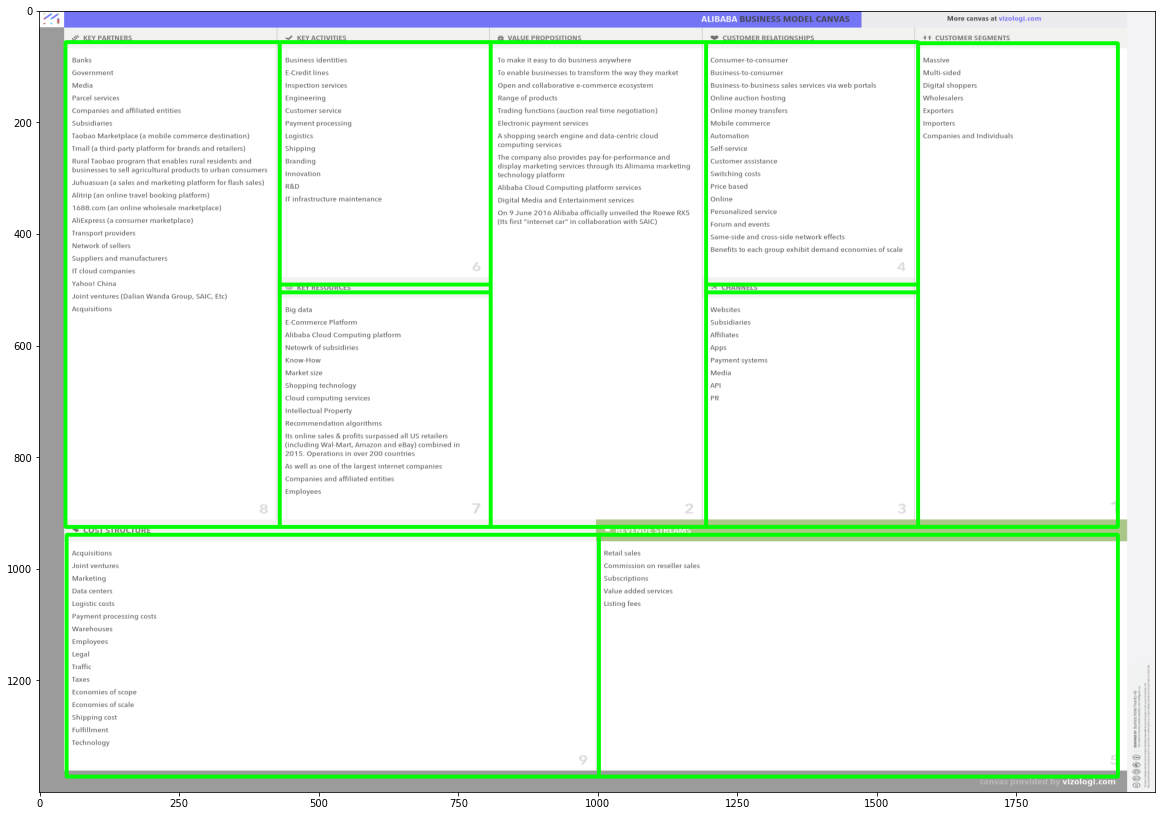

In [46]:
x = cv2.imread(filename)
x1 = cv2.rectangle(x, [cor[0][3][0]-30,cor[0][3][1]], [cor[9][2][0],cor[4][0][1]], (0,255,0), 5)
x2 = cv2.rectangle(x1, [cor[1][3][0]-30,cor[1][3][1]], [cor[3][0][0]-30,cor[4][0][1]], (0,255,0), 5)
x3 = cv2.rectangle(x2, [cor[3][3][0]-30,cor[2][3][1]], [cor[0][3][0]-30,cor[4][0][1]], (0,255,0), 5)
x4 = cv2.rectangle(x3, [cor[3][3][0]-30,cor[3][3][1]], [cor[0][3][0]-30,cor[2][0][1]], (0,255,0), 5)
x5 = cv2.rectangle(x4, [cor[4][3][0]-30,cor[4][3][1]], [cor[9][2][0],cor[9][0][1]], (0,255,0), 5)
x6 = cv2.rectangle(x5, [cor[5][3][0]-30,cor[5][3][1]], [cor[1][3][0]-30,cor[6][0][1]], (0,255,0), 5)
x7 = cv2.rectangle(x6, [cor[6][3][0]-30,cor[6][3][1]], [cor[1][3][0]-30,cor[8][0][1]], (0,255,0), 5)
x8 = cv2.rectangle(x7, [cor[7][3][0]-30,cor[7][3][1]], [cor[5][3][0]-30,cor[8][0][1]], (0,255,0), 5)
x9 = cv2.rectangle(x8, [cor[8][3][0]-30,cor[8][3][1]], [cor[4][3][0]-30,cor[9][0][1]], (0,255,0), 5)
plt.figure(figsize=(20,20))
plt.imshow(x1)
plt.show()

# Text Extraction From Each Box

## Box 1

In [47]:
crop_img1 = resized[cor[0][3][1] : cor[4][0][1], cor[0][3][0]-30 : cor[9][2][0]]
result1 = reader.readtext(crop_img1)
for i in range(len(result1)):
    print(result1[i][1])

Massive
Multi-sided
Digital shoppers
Wholesalers
Exporters
Importers
Companies and Individuals


## Box 2

In [48]:
crop_img2 = resized[cor[1][3][1] : cor[4][0][1], cor[1][3][0]-30 : cor[3][0][0]-30]
result2 = reader.readtext(crop_img2)
for i in range(len(result2)):
    print(result2[i][1])

To make
edsy
do business anywhere
To enable businesses to transform the way
market
Open and collaborative
CC
ecosystem
ol products
Trading functions (auction real
time negotiation)
Electronic payment services
shopping search engine and data-centric cloud
computing services
The company also provides pay for-performance and
display marketing services through Its Alimama marketing
technology platform
Alibaba Cloud Computing
Iatform services
Digita
Medla and
Entertalnment services
June 2016 Alibaba officially unveiled the Roewe RXS
(Its first "internet car"
collaboration with SAIC)
2
they
Range


## Box 3

In [49]:
crop_img3 = resized[cor[2][3][1] : cor[4][0][1], cor[2][3][0]-30 : cor[0][3][0]-30]
result3 = reader.readtext(crop_img3)
for i in range(len(result3)):
    print(result3[i][1])

Websites
Subsidiaries
Affiliates
Apps
Payment systems
Media
API


## Box 4

In [50]:
crop_img4 = resized[cor[3][3][1] : cor[2][0][1], cor[3][3][0]-30 : cor[0][3][0]-30]
result4 = reader.readtext(crop_img4)
for i in range(len(result4)):
    print(result4[i][1])

Consumer-to-consumer
Business-to-consumer
Business to business sales services via web portals
Online auction hosting
Online money transfers
Mobile commerce
Automation
Self service
Customer assislance
Switching costs
Price based
Online
Personalized service
Forum and events
Same-side and cross-side network effects
Benefits to cach group exhibit demand economies of scale


## Box 5

In [51]:
crop_img5 = resized[cor[4][3][1] : cor[9][0][1], cor[4][3][0]-30 : cor[9][2][0]]
result5 = reader.readtext(crop_img5)
for i in range(len(result5)):
    print(result5[i][1])

Retail sales
Commission on rescller sales
Subscriptions
Value added services
Listing fees


## Box 6

In [52]:
crop_img6 = resized[cor[5][3][1] : cor[6][0][1], cor[5][3][0]-30 : cor[1][3][0]-30]
result6 = reader.readtext(crop_img6)
for i in range(len(result6)):
    print(result6[i][1])

Business identities
E-Credit lines
Inspection services
Engineering
Customer service
Payment processing
Logistics
Shipping
Branding
Innovation
RED
IT Infrastructure malntenance


## Box 7

In [53]:
crop_img7 = resized[cor[6][3][1] : cor[8][0][1], cor[6][3][0]-30 : cor[1][3][0]-30]
result7 = reader.readtext(crop_img7)
for i in range(len(result7)):
    print(result7[i][1])

Big data
Commerce
Platform
Alibaba Cloud Computing plalform
Netowrk of subsidiries
Know How
Markel size
Shopping technology
Cloud computing services
Inte
ectual Property
Recommendation algorithms
Ils online sales
prolits surpassed all US retailers
(Including Wal-Mart, Amazon and eBay) combined in
2015
Operations in over 200 countries
As well as one of the
largest internet companies
Companies and affiliated entities
Employees


## Box 8

In [54]:
crop_img8 = resized[cor[7][3][1] : cor[8][0][1], cor[7][3][0]-30 : cor[5][3][0]-30]
result8 = reader.readtext(crop_img8)
for i in range(len(result8)):
    print(result8[i][1])

Banks
Government
Media
Parcel services
Companies and affiliated entities
Subsidiaries
Taobao Marketplace (a mobile commerce destination)
Tmall (a third party platform for brands and retailers)
Rural Taobao program lhat enables rural residents and
businesses
sell agricultural products to urban consumers
Juhuasuan (a sales and marketing platform for flash sales)
Alitrip (an online travel booking plalform)
1688.com (an online wholesale marketplace)
AliExpress
consumei
marketplace)
Transport providers
Network of sellers
Suppliers and manufacturers
IT cloud companies
Yahoo! China
Joint ventures (Dallan Wanda Group, SAIC,
Acquisitions
Etc)


## Box 9

In [55]:
crop_img9 = resized[cor[8][3][1] : cor[9][0][1], cor[8][3][0]-30 : cor[4][3][0]-30]
result9 = reader.readtext(crop_img9)
for i in range(len(result9)):
    print(result9[i][1])

Acquisitions
Joint ventures
Marketing
Data centers
Logistic costs
Payment processing costs
Warchouses
Employees
Legal
Traffic
Taxes
Economies 0f
scope
Economies of scale
Shipping cost
Fulfillment
Technology
